In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Suicide_Ideation_Dataset(Twitter-based).csv to Suicide_Ideation_Dataset(Twitter-based).csv


In [ ]:
df = pd.read_csv("Suicide_Ideation_Dataset(Twitter-based).csv")
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


# Cleaning the data

In [ ]:
# Remove all words that start with '@' since they're names, do lowercase
df['Tweet'] = df['Tweet'].str.replace(r'@\w+', '', regex=True).str.lower()

In [ ]:
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,you want his money.,Not Suicide post
2,that crap took me forever to put together. iâ...,Potential Suicide post
3,#kiwitweets hey jer! since when did you start...,Not Suicide post
4,trying out &quot;delicious library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my nokia n95-1,Not Suicide post
1783,starting my day out with a positive attitude! ...,Not Suicide post
1784,"hey, it's 5 am...give a girl some credit for ...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


In [ ]:
# Replace special characters
df['Tweet_cleaned'] = df['Tweet'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df

,Tweet,Suicide,Tweet_cleaned
0,making some lunch,Not Suicide post,making some lunch
1,you want his money.,Not Suicide post,you want his money
2,that crap took me forever to put together. iâ...,Potential Suicide post,that crap took me forever to put together im ...
3,#kiwitweets hey jer! since when did you start...,Not Suicide post,kiwitweets hey jer since when did you start t...
4,trying out &quot;delicious library 2&quot; wit...,Not Suicide post,trying out quotdelicious library 2quot with mi...
...,...,...,...
1782,i have forgotten how much i love my nokia n95-1,Not Suicide post,i have forgotten how much i love my nokia n951
1783,starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude t...
1784,"hey, it's 5 am...give a girl some credit for ...",Not Suicide post,hey its 5 amgive a girl some credit for trying
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...


In [ ]:
# Remove NA
df['Tweet_cleaned'] = df['Tweet_cleaned'].fillna('')

## Using SpaCy for tokenization, lemmatization, stop words etc

In [ ]:
nlp = spacy.load('en_core_web_sm')  # load english model

### Tokenization and lemmatization

In [ ]:
def tokenize(text):
  doc = nlp(text)
  return [token.lemma_ for token in doc if token.lemma_.strip() != '']

df['lemma'] = df['Tweet_cleaned'].apply(tokenize)


In [ ]:
df

,Tweet,Suicide,Tweet_cleaned,lemmas,lemma,lemmas_joined
0,making some lunch,Not Suicide post,making some lunch,"[make, some, lunch]","[make, some, lunch]",make some lunch
1,you want his money.,Not Suicide post,you want his money,"[you, want, his, money]","[you, want, his, money]",you want his money
2,that crap took me forever to put together. iâ...,Potential Suicide post,that crap took me forever to put together im ...,"[that, crap, take, I, forever, to, put, togeth...","[that, crap, take, I, forever, to, put, togeth...",that crap take I forever to put together I m g...
3,#kiwitweets hey jer! since when did you start...,Not Suicide post,kiwitweets hey jer since when did you start t...,"[kiwitweets, hey, jer, since, when, do, you, s...","[kiwitweets, hey, jer, since, when, do, you, s...",kiwitweets hey jer since when do you start twi...
4,trying out &quot;delicious library 2&quot; wit...,Not Suicide post,trying out quotdelicious library 2quot with mi...,"[try, out, quotdelicious, library, 2quot, with...","[try, out, quotdelicious, library, 2quot, with...",try out quotdelicious library 2quot with mixed...
...,...,...,...,...,...,...
1782,i have forgotten how much i love my nokia n95-1,Not Suicide post,i have forgotten how much i love my nokia n951,"[I, have, forget, how, much, I, love, my, noki...","[I, have, forget, how, much, I, love, my, noki...",I have forget how much I love my nokia n951
1783,starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude t...,"[start, my, day, out, with, a, positive, attit...","[start, my, day, out, with, a, positive, attit...",start my day out with a positive attitude to b...
1784,"hey, it's 5 am...give a girl some credit for ...",Not Suicide post,hey its 5 amgive a girl some credit for trying,"[hey, its, 5, amgive, a, girl, some, credit, f...","[hey, its, 5, amgive, a, girl, some, credit, f...",hey its 5 amgive a girl some credit for try
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...,"[2, drunken, bestie, stumble, into, my, room, ...","[2, drunken, bestie, stumble, into, my, room, ...",2 drunken bestie stumble into my room and we r...


# Vectorization (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join lemmas back into a string
df['lemmas_joined'] = df['lemmas'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')


# Vectorize with built-in stopword removal
tv = TfidfVectorizer(stop_words='english')
X = tv.fit_transform(df['lemmas_joined'])
# tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tv.get_feature_names_out())


# Training the model to predict the output of the tweet

In [ ]:
# Target variable
y = df['Suicide']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predictions
y_pred = rf.predict(X_test)

                         precision    recall  f1-score   support

       Not Suicide post       0.86      0.97      0.91       217
Potential Suicide post        0.95      0.75      0.84       141

               accuracy                           0.89       358
              macro avg       0.90      0.86      0.87       358
           weighted avg       0.89      0.89      0.88       358



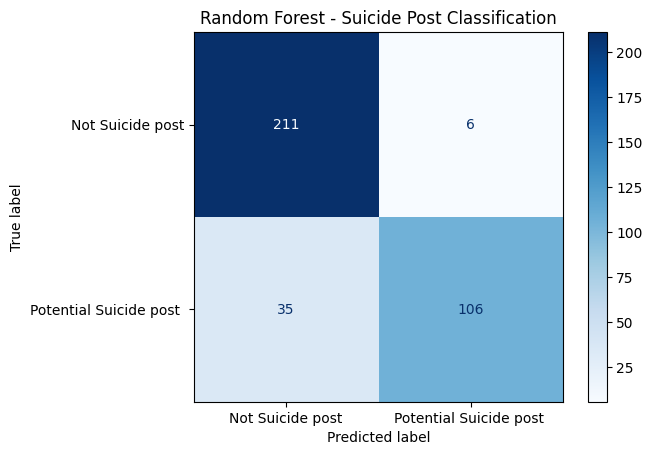

In [ ]:
#  Metrics
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest - Suicide Post Classification")
plt.show()

# Define top-10 words that helped to predict if the post is suicide

In [ ]:
# Top-10 most important words
feature_names = tv.get_feature_names_out()
importances = rf.feature_importances_


In [ ]:
# Get indices of top 5 features
top10_idx = importances.argsort()[-10:][::-1]
top10_words = feature_names[top10_idx]
top10_importances = importances[top10_idx]

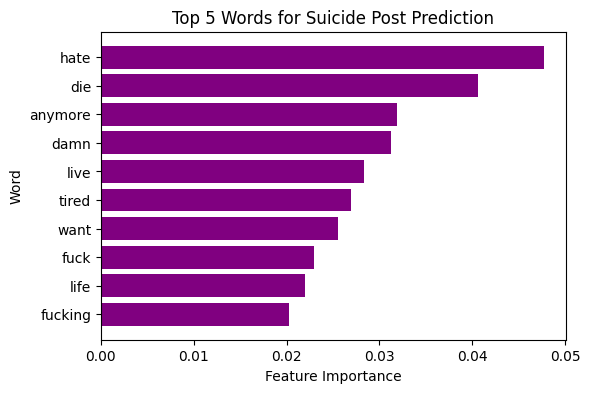

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
plt.barh(top10_words, top10_importances, color='purple')
plt.xlabel("Feature Importance")
plt.ylabel("Word")
plt.title("Top 10 Words for Suicide Post Prediction")
plt.gca().invert_yaxis()  # highest importance at top
plt.show()